In [1]:
# For classifying apples and oranges based on colors and sweetness/sourness
# we will create data on our own and test it using Knn algorithm


In [2]:
import numpy as np
from matplotlib import pyplot as plt
# matplotlib inline means that the graphs will be 
# plotted in the same window, not a separate window
%matplotlib inline

In [39]:
# First we need some data. For this we'll be using a probability distribution
# We will try to define some parameters but before that
# let's discuss what these parameters do for a distribution
# we're assuming that what all points we'll generate, their
# mean will be along (0,2)
mean_01 = np.asarray([0., 2.])

# Similarly we have assumed the standard deviation also
sigma_01 = np.asarray([[1.0, 0.0], [0.0, 1.0]])

print(mean_01)
print(sigma_01)

data_01 = np.random.multivariate_normal(mean_01, sigma_01, 500)
#print(data_01)
print(data_01.shape)


# Generating a second cluster
mean_02 = np.asarray([4., 0.])
sigma_02 = np.asarray([[1.0, 0.0], [0.0, 1.0]])
data_02 = np.random.multivariate_normal(mean_02, sigma_02, 500)
print(data_02.shape)

[0. 2.]
[[1. 0.]
 [0. 1.]]
(500, 2)
(500, 2)


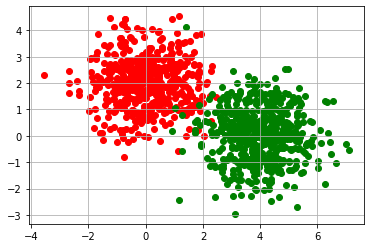

In [50]:
plt.figure(0)
plt.grid('on')
#plt.xlim(0, 10)
#plt.ylim(0, 10)
plt.scatter(data_01[:, 0], data_01[:, 1], color = "red")
plt.scatter(data_02[:, 0], data_02[:, 1], color = "green")
plt.show()

In [51]:
# We have a total of 1000 data points 500 of classs Red, 500 of class Green
# We are manually setting the last 500 points as 1
# and first 500 points as 0.
labels = np.zeros((1000, 1))
labels[500:, :] = 1.0

In [52]:
data = np.concatenate([data_01, data_02], axis = 0)
print(data.shape)

(1000, 2)


In [55]:
# WE ARE SHUFFLING THE DATA, because when we feed the values in order,
# it gets trained as 0 for first 500 values, irrespective of the features
# that those points hold. 
# So we'll train our model by providing data in random order. So that
# it gets trained based on the features of the points
ind = list(range(1000))
np.random.shuffle(ind)
print(ind[:10])

[505, 146, 951, 177, 509, 75, 990, 192, 219, 925]


In [66]:
data = data[ind]
labels = labels[ind]
print (data.shape)
print(labels.shape)

(1000, 2)
(1000, 1)


In [122]:
def distance(x1, x2):
    return np.sqrt(((x1-x2)**2).sum())


# x = Testing Point
# train = Training Data
# targets = Training Labels
def knn(x, train, targets, k = 5):
    m = train.shape[0]
    dist = []
    for i in range(m):
        # Compute distance from each point and store in dist[]
        dist.append(distance(x, train[i]))
    dist = np.asarray(dist)
    indx = np.argsort(dist)
    # Retrieving the starting k values after getting all the labels
    # which are close to the testing point
    sorted_labels = labels[indx][:k]
    #print(sorted_labels)
    
    #print(train)
    
    # Unique function takes a list and returns the total distinct
    # values in a list with their count
    
    
    #print(np.unique(sorted_labels, return_counts = True))
    counts = np.unique(sorted_labels, return_counts = True)
    # Here we are printing the label whose count was greater in the previous step
    # count[0] has the labels that are 0, 1 here
    # count[1] contains their counts. We are printing the label which has
    # maximum value in count[1].
    return counts[0][np.argmax(counts[1])]
x_test = np.asarray([2.0, 0.0])
knn(x_test, data, labels)

1.0

In [123]:
# Dividing our data into training and testing sets 75 and 25
split = int(data.shape[0] * 0.75)
x_train = data[:split]
x_test = data[split:]

y_train = labels[:split]
y_test = labels[split:]

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(750, 2) (250, 2)
(750, 1) (250, 1)


In [131]:
# Create placeholder for storing test predictions
preds = []

# Run a loop over every testing example and store the predictions

for i in range(x_test.shape[0]):
    preds.append(knn(x_test[i], x_train, y_train))
preds = np.asarray(preds).reshape(250,1)
print(preds.shape)

(250, 1)


In [134]:
# This returns the sum of all the values that are true or false.
# Here 247 means that 247 results are accurately matched
# while 3 are wrong
print("Matched results = ",(preds == y_test).sum())

print("Accuracy :", 100*(preds == y_test).sum()/preds.shape[0])

Matched results =  247
Accuracy : 98.8
